**Brian Blaylock**  
*January 27, 2022*

# ECMWF Open Data -- Real Time

> [Media Statement](https://www.ecmwf.int/en/about/media-centre/news/2022/ecmwf-makes-wide-range-data-openly-available)
>
> The data that are becoming available are based on a range of high-resolution forecasts (HRES ‚Äì 9 km horizontal resolution) and ensemble forecasts (ENS ‚Äì 18 km horizontal resolution). **They will be made accessible at a resolution of 0.4 x 0.4 degrees**.

This data is freely available from ECMWF in GRIB2 format ([read more üëÄ](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time)).

There following prodcuts are available:
- `"oper"` - operational high-resolution forecast, atmospheric fields
- `"enfo"` - ensemble forecast, atmospheric fields
- `"wave"` - wave forecasts
- `"waef"` - ensemble forecast, ocean wave fields


In [34]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from herbie.archive import Herbie

# The following are imported from
# https://github.com/blaylockbk/Carpenter_Workshop
from paint.standard2 import cm_tmp, cm_wind, cm_wave_height
from toolbox.cartopy_tools import common_features, pc


## Retrieve a full file
Download a full GRIB2 file to your local system.

In [39]:
H = Herbie("2022-01-26", model="ecmwf", product="oper", fxx=12)
H.download()


üèãüèª‚Äç‚ôÇÔ∏è Found 2022-Jan-26 00:00 UTC F12 [ECMWF] [product=oper] GRIB2 file from azure and index file from azure.                                                                                                                                                       
‚úÖ Success! Downloaded ECMWF from azure               
	src: https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-12h-oper-fc.grib2
	dst: /p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-12h-oper-fc.grib2


## Download/Retrieve a subset

This relys on the `searchString` argument to parse out information from the GRIB2's index file. The ECMWF index files are different than the wgrib2-style index files, so pay close attention to how you should select the field you want.

In [40]:
# Show the searchString_help
print(H.searchString_help)



Use regular expression to search for lines in the index file.
Here are some examples you can use for the ecCodes-style `searchString`

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db

======================== ==============================================
searchString (oper/enso) Messages that will be downloaded
======================== ==============================================
":2t:"                   2-m temperature
":10u:"                  10-m u wind vector
":10v:"                  10-m v wind vector
":10(u|v):               **10m u and 10m v wind**
":d:"                    Divergence
":gh:"                   geopotential height (all levels)
":st:"                   soil temperature
":tp:"                   total precipitation
":msl:"                  mean sea level pressure
":q:"                    Specific Humidity
":r:"                    relative humidity
":ro:"                   Runn-off
":skt:"                  skin temperature
":sp:

In [41]:
# Look at the search_this column of the index DataFrame
H.read_idx().search_this

grib_message
1        :skt:sfc:g:0001:od:fc:oper
2         :st:sfc:g:0001:od:fc:oper
3     :gh:1000:pl:g:0001:od:fc:oper
4      :gh:925:pl:g:0001:od:fc:oper
5       :r:300:pl:g:0001:od:fc:oper
                  ...              
78      :d:250:pl:g:0001:od:fc:oper
79     :vo:250:pl:g:0001:od:fc:oper
80      :vo:50:pl:g:0001:od:fc:oper
81        :ro:sfc:g:0001:od:fc:oper
82       :d:50:pl:g:0001:od:fc:oper
Name: search_this, Length: 82, dtype: object

In [42]:
ds = H.xarray(":2t:")


üìá Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F12                                                            
 cURL from https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-12h-oper-fc.grib2
   1: GRIB_message=35  :2t:sfc:g:0001:od:fc:oper


In [43]:
ds


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 12:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26T12:00:00
Data variables:
    t2m                  (latitude, longitude) float32 247.7 247.7 ... 245.5
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

## Plots

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


Text(1.0, 1.0, '2 metre temperature')

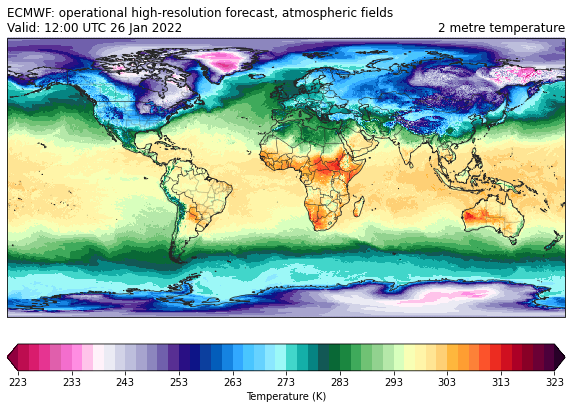

In [44]:
ax = common_features("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")


In [28]:
H = Herbie("2022-01-26", model="ecmwf", product="oper")

# Get u and v wind component
ds = H.xarray(":10(u|v):")

# Compute the wind speed
ds["spd"] = np.sqrt(ds["u10"] ** 2 + ds["v10"] ** 2)
# wihtout too much thought, just quickly copy attributes
ds["spd"].attrs = ds["u10"].attrs.copy()
ds["spd"].attrs["standard_name"] = "wind_speed"
ds["spd"].attrs["long_name"] = "10 m wind speed"
ds["spd"].attrs["GRIB_name"] = "10 m Wind Speed"


ds


üèãüèª‚Äç‚ôÇÔ∏è Found 2022-Jan-26 00:00 UTC F00 [ECMWF] [product=oper] GRIB2 file from local and index file from azure.                                                                                                                                                       
üìá Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F00                                                            
 cURL from file:///p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-0h-oper-fc.grib2
   1: GRIB_message=34  :10v:sfc:g:0001:od:fc:oper
   2: GRIB_message=39  :10u:sfc:g:0001:od:fc:oper


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:683: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 10.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    u10                  (latitude, longitude) float32 8.174 8.174 ... -5.998
    v10                  (latitude, longitude) float32 3.499 3.499 ... 3.733
    gribfile_projection  object None
    spd                  (latitude, longitude) float32 8.891 8.891 ... 7.065
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


Text(1.0, 1.0, '10 m Wind Speed')

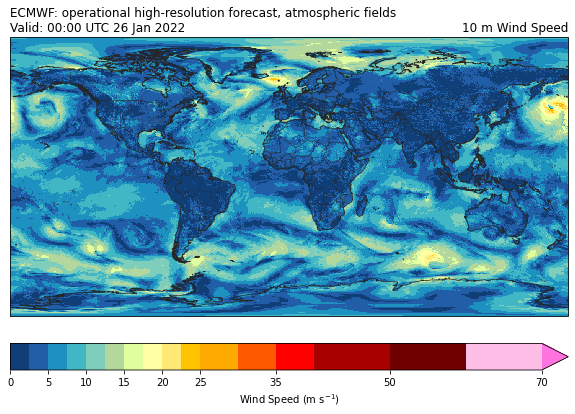

In [29]:
ax = common_features("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.spd, transform=pc, **cm_wind().cmap_kwargs
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.spd.GRIB_name, loc="right")


In [9]:
# Get 500 hPa specific humidity and geopotential height
ds = H.xarray(":(q|gh):500")
ds


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:683: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


üìá Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F00                                                            
 cURL from file:///p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-0h-oper-fc.grib2
   1: GRIB_message=29  :gh:500:pl:g:0001:od:fc:oper
   2: GRIB_message=48  :q:500:pl:g:0001:od:fc:oper


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:683: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 500.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    q                    (latitude, longitude) float32 6.679e-05 ... 0.0001641
    gh                   (latitude, longitude) float32 5.029e+03 ... 5.136e+03
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

Text(1.0, 1.0, '500.0 hPa\nSpecific humidity/Geopotential Height')

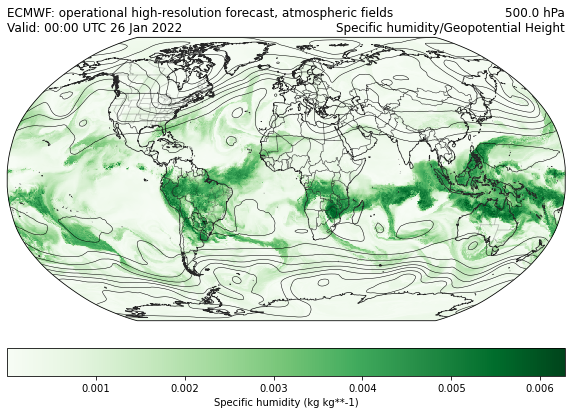

In [10]:
ax = common_features("50m", crs=ccrs.Robinson(), figsize=[10, 10]).STATES().BORDERS().ax

# Color shade by specific humidity
p = ax.pcolormesh(ds.longitude, ds.latitude, ds.q, transform=pc, cmap="Greens")

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    label=f"{ds.q.GRIB_name} ({ds.q.units})",
)

# Contours for geopotential height
ax.contour(
    ds.longitude,
    ds.latitude,
    ds.gh,
    transform=pc,
    colors="k",
    linewidths=.5,
    levels=range(0,10_000,60*2)
)


ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(
    f"{ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}\n{ds.q.GRIB_name}/{ds.gh.GRIB_name}", loc="right"
)


## ECMWF Wave Output

In [11]:
H = Herbie('2022-01-26 00:00', model='ecmwf', product='wave')

üèãüèª‚Äç‚ôÇÔ∏è Found 2022-Jan-26 00:00 UTC F00 [ECMWF] [product=wave] GRIB2 file from azure and index file from azure.                                                                                                                                                       


In [12]:
ds = H.xarray(None)

‚úÖ Success! Downloaded ECMWF from azure               
	src: https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/wave/20220126000000-0h-wave-fc.grib2
	dst: /p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-0h-wave-fc.grib2


In [13]:
ds

<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    meanSea              float64 0.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    mp2                  (latitude, longitude) float32 nan nan nan ... nan nan
    swh                  (latitude, longitude) float32 nan nan nan ... nan nan
    mwd                  (latitude, longitude) float32 nan nan nan ... nan nan
    pp1d                 (latitude, longitude) float32 nan nan nan ... nan nan
    mwp                  (latitude, longitude) float32 nan nan nan ... nan nan
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 wave
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


Text(1.0, 1.0, 'Significant height of combined wind waves and swell')

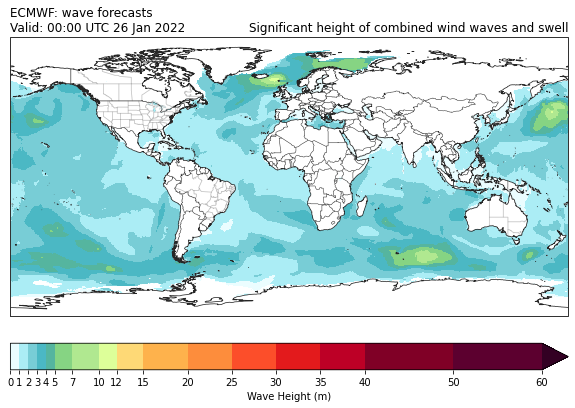

In [14]:
ax = common_features("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.swh, transform=pc, **cm_wave_height(units='m').cmap_kwargs
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wave_height(units='m').cbar_kwargs)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.swh.GRIB_name, loc="right")


## Ensemble Forecast Products

In [15]:
H = Herbie('2022-01-26 00:00', model='ecmwf', product='enfo')
ds = H.xarray(':2t:')
ds

üèãüèª‚Äç‚ôÇÔ∏è Found 2022-Jan-26 00:00 UTC F00 [ECMWF] [product=enfo] GRIB2 file from azure and index file from azure.                                                                                                                                                       
üìá Download subset: [ECMWF] model [enfo] product run at 2022-Jan-26 00:00 UTC F00                                                            
 cURL from https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/enfo/20220126000000-0h-enfo-ef.grib2
   1: GRIB_message=1   :2t:sfc:29:g:0001:od:pf:enfo
   2: GRIB_message=4   :2t:sfc:2:g:0001:od:pf:enfo
   3: GRIB_message=20  :2t:sfc:19:g:0001:od:pf:enfo
   4: GRIB_message=39  :2t:sfc:38:g:0001:od:pf:enfo
   5: GRIB_message=45  :2t:sfc:22:g:0001:od:pf:enfo
   6: GRIB_message=52  :2t:sfc:12:g:0001:od:pf:enfo
   7: GRIB_message=53  :2t:sfc:14:g:0001:od:pf:enfo
   8: GRIB_message=55  :2t:sfc:7:g:0001:od:pf:enfo
   9: GRIB_message=58  :2t:sfc:39:g:0001:od:pf:e

[<xarray.Dataset>
 Dimensions:              (number: 50, latitude: 451, longitude: 900)
 Coordinates:
   * number               (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
     time                 datetime64[ns] 2022-01-26
     step                 timedelta64[ns] 00:00:00
     heightAboveGround    float64 2.0
   * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
   * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
     valid_time           datetime64[ns] 2022-01-26
 Data variables:
     t2m                  (number, latitude, longitude) float32 246.5 ... 246.2
     gribfile_projection  object None
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts
     model:        

In [16]:
# Dataset with all 50 members
ds[0]

<xarray.Dataset>
Dimensions:              (number: 50, latitude: 451, longitude: 900)
Coordinates:
  * number               (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    t2m                  (number, latitude, longitude) float32 246.5 ... 246.2
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 enfo
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

In [17]:
# This Dataset is of the mean of all the members, right?
ds[1]

<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    number               int64 0
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    t2m                  (latitude, longitude) float32 246.2 246.2 ... 246.3
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 enfo
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

In [18]:
H.idx

'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/enfo/20220126000000-0h-enfo-ef.index'

## Ensemble Wave Products

In [19]:
H = Herbie('2022-01-26 00:00', model='ecmwf', product='waef')
ds = H.xarray(None)
ds

üèãüèª‚Äç‚ôÇÔ∏è Found 2022-Jan-26 00:00 UTC F00 [ECMWF] [product=waef] GRIB2 file from azure and index file from azure.                                                                                                                                                       
‚úÖ Success! Downloaded ECMWF from azure               
	src: https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/waef/20220126000000-0h-waef-ef.grib2
	dst: /p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-0h-waef-ef.grib2
Note: Returning a list of [6] xarray.Datasets because of multiple hypercubes.


[<xarray.Dataset>
 Dimensions:              (number: 50, latitude: 451, longitude: 900)
 Coordinates:
   * number               (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
     time                 datetime64[ns] 2022-01-26
     step                 timedelta64[ns] 00:00:00
     meanSea              float64 0.0
   * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
   * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
     valid_time           datetime64[ns] 2022-01-26
 Data variables:
     mp2                  (number, latitude, longitude) float32 nan nan ... nan
     swh                  (number, latitude, longitude) float32 nan nan ... nan
     mwd                  (number, latitude, longitude) float32 nan nan ... nan
     pp1d                 (number, latitude, longitude) float32 nan nan ... nan
     mwp                  (number, latitude, longitude) float32 nan nan ... nan
     gribfile_projection  object None
 Attribute

In [20]:
len(ds)

2

In [21]:
ds[0]

<xarray.Dataset>
Dimensions:              (number: 50, latitude: 451, longitude: 900)
Coordinates:
  * number               (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    meanSea              float64 0.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    mp2                  (number, latitude, longitude) float32 nan nan ... nan
    swh                  (number, latitude, longitude) float32 nan nan ... nan
    mwd                  (number, latitude, longitude) float32 nan nan ... nan
    pp1d                 (number, latitude, longitude) float32 nan nan ... nan
    mwp                  (number, latitude, longitude) float32 nan nan ... nan
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 waef
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

In [22]:
ds[1]

<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    number               int64 0
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 00:00:00
    meanSea              float64 0.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26
Data variables:
    mp2                  (latitude, longitude) float32 nan nan nan ... nan nan
    swh                  (latitude, longitude) float32 nan nan nan ... nan nan
    mwd                  (latitude, longitude) float32 nan nan nan ... nan nan
    pp1d                 (latitude, longitude) float32 nan nan nan ... nan nan
    mwp                  (latitude, longitude) float32 nan nan nan ... nan nan
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 waef
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

In [33]:
H = Herbie('2022-01-26', model='ecmwf', product='enfo')
H.read_idx()

üèãüèª‚Äç‚ôÇÔ∏è Found 2022-Jan-26 00:00 UTC F00 [ECMWF] [product=enfo] GRIB2 file from azure and index file from azure.                                                                                                                                                       


start_byte    end_byte                  range reference_time  \
grib_message                                                                 
1                      0      609069               0-609069     2022-01-26   
2                 609069     1218138         609069-1218138     2022-01-26   
3                1218138     1827207        1218138-1827207     2022-01-26   
4                1827207     2436276        1827207-2436276     2022-01-26   
5                2436276     3045345        2436276-3045345     2022-01-26   
...                  ...         ...                    ...            ...   
4178          2574120261  2574932280  2574120261-2574932280     2022-01-26   
4179          2574932280  2575744299  2574932280-2575744299     2022-01-26   
4180          2575744299  2576556318  2575744299-2576556318     2022-01-26   
4181          2576556318  2577368337  2576556318-2577368337     2022-01-26   
4182          2577368337  2578180356  2577368337-2578180356     2022-01-26   

             valid_time   step param levelist levtype number domain expver  \
grib_message                                                                 
1            2022-01-26 0 days    2t      NaN     sfc     29      g   0001   
2            2022-01-26 0 days   10u      NaN     sfc     27      g   0001   
3            2022-01-26 0 days   10v      NaN     sfc     14      g   0001   
4            2022-01-26 0 days    2t      NaN     sfc      2      g   0001   
5            2022-01-26 0 days   10u      NaN     sfc     43      g   0001   
...                 ...    ...   ...      ...     ...    ...    ...    ...   
4178         2022-01-26 0 days     d      200      pl     20      g   0001   
4179         2022-01-26 0 days     d      200      pl     41      g   0001   
4180         2022-01-26 0 days     d      200      pl      4      g   0001   
4181         2022-01-26 0 days     d      200      pl     50      g   0001   
4182         2022-01-26 0 days     d      200      pl     23      g   0001   

             class type stream                     search_this  
grib_message                                                    
1               od   pf   enfo    :2t:sfc:29:g:0001:od:pf:enfo  
2               od   pf   enfo   :10u:sfc:27:g:0001:od:pf:enfo  
3               od   pf   enfo   :10v:sfc:14:g:0001:od:pf:enfo  
4               od   pf   enfo     :2t:sfc:2:g:0001:od:pf:enfo  
5               od   pf   enfo   :10u:sfc:43:g:0001:od:pf:enfo  
...            ...  ...    ...                             ...  
4178            od   pf   enfo  :d:200:pl:20:g:0001:od:pf:enfo  
4179            od   pf   enfo  :d:200:pl:41:g:0001:od:pf:enfo  
4180            od   pf   enfo   :d:200:pl:4:g:0001:od:pf:enfo  
4181            od   pf   enfo  :d:200:pl:50:g:0001:od:pf:enfo  
4182            od   pf   enfo  :d:200:pl:23:g:0001:od:pf:enfo  

[4182 rows x 16 columns]

Here is another examle, just for fun

In [45]:
H = Herbie("2022-01-26", model="ecmwf", product="oper", fxx=12)


üèãüèª‚Äç‚ôÇÔ∏è Found 2022-Jan-26 00:00 UTC F12 [ECMWF] [product=oper] GRIB2 file from local and index file from azure.                                                                                                                                                       


In [46]:

# Download the full grib2 file
H.download()


üåâ Already have local copy --> /p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-12h-oper-fc.grib2


In [47]:

# Download just the 10-m u and v winds
H.download(searchString=":10(u|v):")


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:683: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


üìá Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F12                                                            
 cURL from file:///p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-12h-oper-fc.grib2
   1: GRIB_message=33  :10u:sfc:g:0001:od:fc:oper
   2: GRIB_message=42  :10v:sfc:g:0001:od:fc:oper


In [48]:

# Retrieve the 500 hPa temperature as an xarray.Dataset
ds = H.xarray(searchString=":t:500:")

üìá Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F12                                                            
 cURL from file:///p/cwfs/blaylock/data/ecmwf/20220126/20220126000000-12h-oper-fc.grib2
   1: GRIB_message=34  :t:500:pl:g:0001:od:fc:oper


In [49]:
ds

<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-01-26
    step                 timedelta64[ns] 12:00:00
    isobaricInhPa        float64 500.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-01-26T12:00:00
Data variables:
    t                    (latitude, longitude) float32 234.9 234.9 ... 242.5
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...
    local_grib:              /p/cwfs/blaylock/data/ecmwf/20220126/20220126000...

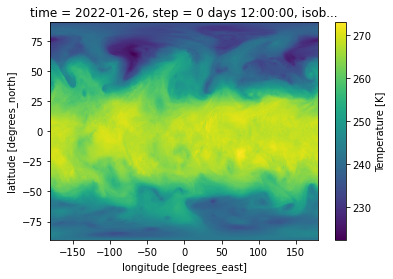

In [50]:
ds.t.plot()

----

**[Attribution](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time#ECMWFOpenDataRealTime-Attribution)**

- Copyright statement: Copyright "¬© 2022 European Centre for Medium-Range Weather Forecasts (ECMWF)".
- Source www.ecmwf.int
- Licence Statement: This data is published under a Creative Commons Attribution 4.0 International (CC BY 4.0). https://creativecommons.org/licenses/by/4.0/
- Disclaimer: ECMWF does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or damage arising from their use.
